init

- 5 day plc signal data stored
- plc data contains [time- date and time], signal IDs

pickle file
- contains key-value pairs for (region, [list of individual sensor_ids])

to-do
- identifying anomalies
- identify cobble intervals
- the shortlisted signals correspond to one of the 14 regions (for ex: sensorID = [1:4] belongs to CVAH_L1)
- output list of time intervals for anomalies
- output list of time intervals for cobble and region involved associated with sensorID

work

1. loading the data [ sensor_ids and sensor_data]
2. cleaning and preprocessing
3. mapping sensor_ids to regions
4. exploratory data analysis
5. understanding anomalies
6. cobble intervals
7. visualizing anomalies and cobble intervals
8. saving results

### loading

In [1]:
import pickle
import pandas as pd

with open('./regionwise_columns.pickle', 'rb') as f:
    sensor_data = pickle.load(f)

df_list = []

for region_id, sensor_ids in sensor_data.items():
    for sensor_id in sensor_ids:
        df_list.append({'Region_ID': region_id, 'Sensor_ID': sensor_id})

sensor_data['CVAH_L1']

['[9.226]',
 '[12:44]',
 '[1:11]',
 '[1:12]',
 '[1:13]',
 '[1:14]',
 '[1:15]',
 '[1:16]',
 '[1:31]',
 '[1:32]',
 '[1:33]',
 '[1:34]',
 '[1:59]',
 '[1:62]',
 '[1:63]',
 '[1:68]',
 '[1:72]',
 '[1:73]',
 '[1.25]',
 '[1.80]',
 '[1.82]',
 '[1.83]',
 '[1.84]',
 '[1.97]',
 '[1.101]',
 '[1.103]',
 '[1.112]',
 '[1.120]',
 '[1.121]',
 '[1.122]',
 '[1.123]',
 '[1.124]',
 '[1.162]',
 '[1.163]',
 '[1.164]',
 '[1.165]',
 '[1.167]',
 '[1.182]',
 '[1.183]',
 '[1.189]',
 '[1.200]',
 '[1.210]',
 '[1.219]',
 '[2:12]',
 '[3:14]',
 '[3:15]',
 '[3:16]',
 '[3:17]',
 '[3:18]',
 '[3:19]',
 '[3:20]',
 '[3:21]',
 '[3:24]',
 '[3:46]',
 '[3:47]',
 '[3:49]',
 '[3:58]',
 '[4:1]',
 '[17:33]',
 '[17:34]',
 '[17:35]',
 '[17:36]',
 '[17:47]',
 '[17:48]',
 '[17:55]',
 '[17:56]',
 '[17:57]',
 '[17:58]',
 '[17:59]',
 '[17:60]',
 '[17.28]',
 '[17.29]',
 '[17.30]',
 '[17.31]',
 '[17.35]',
 '[17.36]',
 '[17.57]',
 '[17.58]',
 '[1:40]',
 '[1:42]',
 '[1.193]',
 '[1.194]',
 '[2:4]',
 '[1:30]']

In [2]:
import os
import pandas as pd
folder_path = './231107/'

dfs = []

for file_name in os.listdir(folder_path):
    if file_name.endswith('.txt'):
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_csv(file_path, delimiter='\t')
        df['Time'] = pd.to_datetime(df['Time'])
        dfs.append(df)
merged_df = pd.concat(dfs, ignore_index=True)
merged_df.sort_values(by='Time', inplace=True)
merged_df.reset_index(drop=True, inplace=True)
merged_df


,Time,[1:0],[1:1],[1:2],[1:3],[1:4],[1:5],[1:6],[1:7],[1:8],...,[26.114],[26.115],[26.116],[26.117],[26.118],[26.119],[26.120],[26.121],[26.122],[26.123]
0,2023-07-11 00:04:10.620,20240,13768,-5078,-7234,-1.038300e+34,6.064080e-36,5,13,13,...,0,0,0,0,1,1,1,0,0,0
1,2023-07-11 00:04:11.620,20240,13768,-5078,-7234,9.467090e-38,-8.762000e+12,-44,13,13,...,0,0,0,0,1,1,1,0,0,0
2,2023-07-11 00:04:12.620,20240,13768,-5078,-2921,-2.841650e-14,3.871730e-34,8,13,13,...,0,0,0,0,1,1,1,0,0,0
3,2023-07-11 00:04:13.620,20240,13768,-5078,-2921,3.946580e-31,-1.092200e-04,-6728,13,13,...,0,0,0,0,1,1,1,0,0,0
4,2023-07-11 00:04:14.620,20240,13768,-5078,-2921,9.934190e-32,4.304790e-42,0,13,13,...,0,0,0,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103295,2023-08-11 00:58:20.950,-29977,29167,-13639,-11502,1.552310e-33,-6.621090e+35,-6,92,92,...,0,0,0,0,1,1,1,0,0,0
103296,2023-08-11 00:58:21.950,-29977,29167,-13639,-11502,3.776800e+22,-4.144010e+34,-8,92,92,...,0,0,0,0,1,1,1,0,0,0
103297,2023-08-11 00:58:22.950,-29977,29167,-9367,-11502,-7.275850e-12,-4.248140e+37,-3,92,92,...,0,0,0,0,1,1,1,0,0,0
103298,2023-08-11 00:58:23.950,-29977,29167,-9367,-11502,2.425120e-35,4.039710e-28,18,92,92,...,0,0,0,0,1,1,1,0,0,0


In [3]:
merged_df.head()

,Time,[1:0],[1:1],[1:2],[1:3],[1:4],[1:5],[1:6],[1:7],[1:8],...,[26.114],[26.115],[26.116],[26.117],[26.118],[26.119],[26.120],[26.121],[26.122],[26.123]
0,2023-07-11 00:04:10.620,20240,13768,-5078,-7234,-1.038300e+34,6.064080e-36,5,13,13,...,0,0,0,0,1,1,1,0,0,0
1,2023-07-11 00:04:11.620,20240,13768,-5078,-7234,9.467090e-38,-8.762000e+12,-44,13,13,...,0,0,0,0,1,1,1,0,0,0
2,2023-07-11 00:04:12.620,20240,13768,-5078,-2921,-2.841650e-14,3.871730e-34,8,13,13,...,0,0,0,0,1,1,1,0,0,0
3,2023-07-11 00:04:13.620,20240,13768,-5078,-2921,3.946580e-31,-1.092200e-04,-6728,13,13,...,0,0,0,0,1,1,1,0,0,0
4,2023-07-11 00:04:14.620,20240,13768,-5078,-2921,9.934190e-32,4.304790e-42,0,13,13,...,0,0,0,0,1,1,1,0,0,0


### cleaning

In [4]:
missing_values = merged_df.isnull().sum()
missing_values

Time        0
[1:0]       0
[1:1]       0
[1:2]       0
[1:3]       0
           ..
[26.119]    0
[26.120]    0
[26.121]    0
[26.122]    0
[26.123]    0
Length: 2624, dtype: int64

### mapping sensorIDs to regions

### eda

In [5]:
summary_stats = merged_df.describe()
summary_stats

,Time,[1:0],[1:1],[1:2],[1:3],[1:4],[1:5],[1:6],[1:7],[1:8],...,[26.114],[26.115],[26.116],[26.117],[26.118],[26.119],[26.120],[26.121],[26.122],[26.123]
count,103300,103300.000000,103300.000000,103300.000000,103300.000000,9.882700e+04,9.537800e+04,103300.000000,103300.000000,103300.000000,...,103300.0,103300.0,103300.0,103300.0,103300.0,103300.0,103300.0,103300.0,103300.0,103300.0
mean,2023-07-12 11:33:18.817104128,3726.570068,429.052246,540.233001,1217.379506,-1.169942e+36,-1.970294e+36,1.137667,101.080116,101.080116,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
min,2023-07-11 00:04:10.620000,-32703.000000,-32704.000000,-32768.000000,-32766.000000,-4.253460e+37,-5.149200e+37,-7059.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
25%,2023-07-11 03:27:10.209999872,-9764.000000,-12005.000000,-11222.000000,-10810.000000,-6.336610e+29,-1.622150e+32,-6.000000,31.000000,31.000000,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
50%,2023-07-11 10:37:35.120000,7680.000000,-1416.000000,-878.000000,104.000000,0.000000e+00,1.793660e-42,0.000000,93.000000,93.000000,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
75%,2023-07-11 17:48:00.040000,17521.000000,13014.000000,14655.000000,14990.250000,6.162980e-33,2.425780e-35,6.000000,137.000000,137.000000,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
max,2023-08-11 00:58:24.950000,32713.000000,32694.000000,32765.000000,32759.000000,4.551830e+37,5.080140e+37,7068.000000,312.000000,312.000000,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
std,NaN,17755.109801,17271.321063,17205.840026,17317.178866,6.203487e+36,8.014197e+36,1017.862835,80.012625,80.012625,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


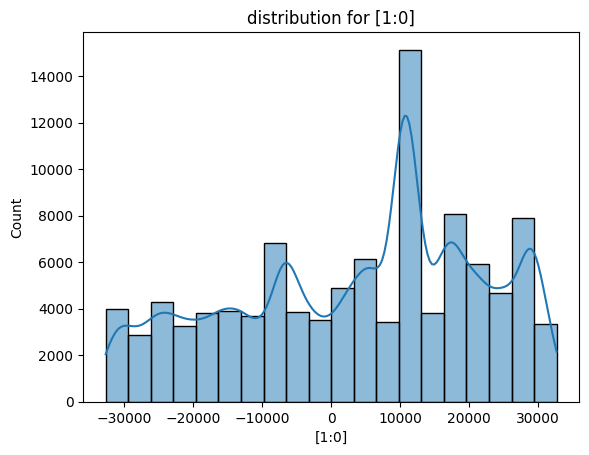

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(merged_df['[1:0]'], bins=20, kde=True)
plt.title('distribution for [1:0]')
plt.show()


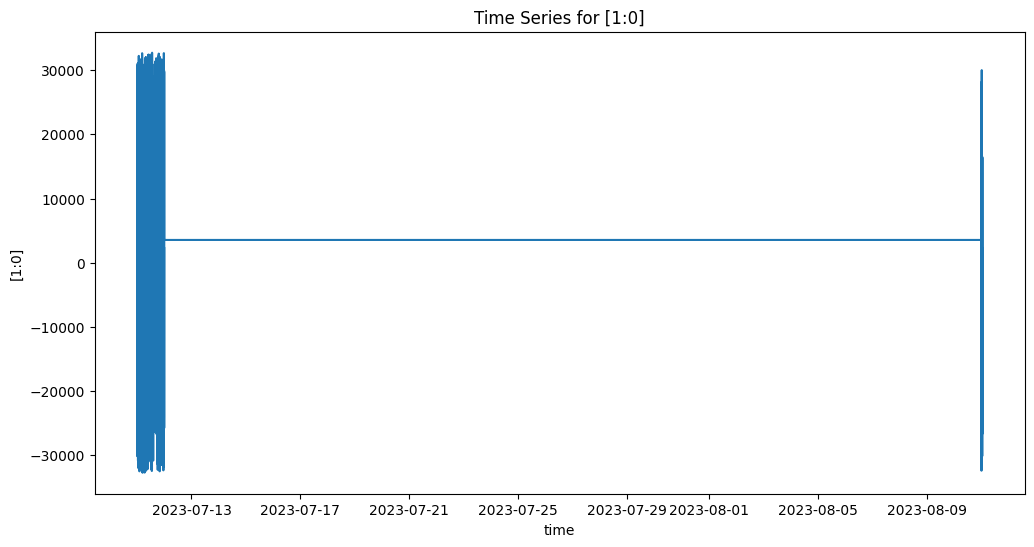

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(merged_df['Time'], merged_df['[1:0]'])
plt.title('Time Series for [1:0]')
plt.xlabel('time')
plt.ylabel('[1:0]')
plt.show()

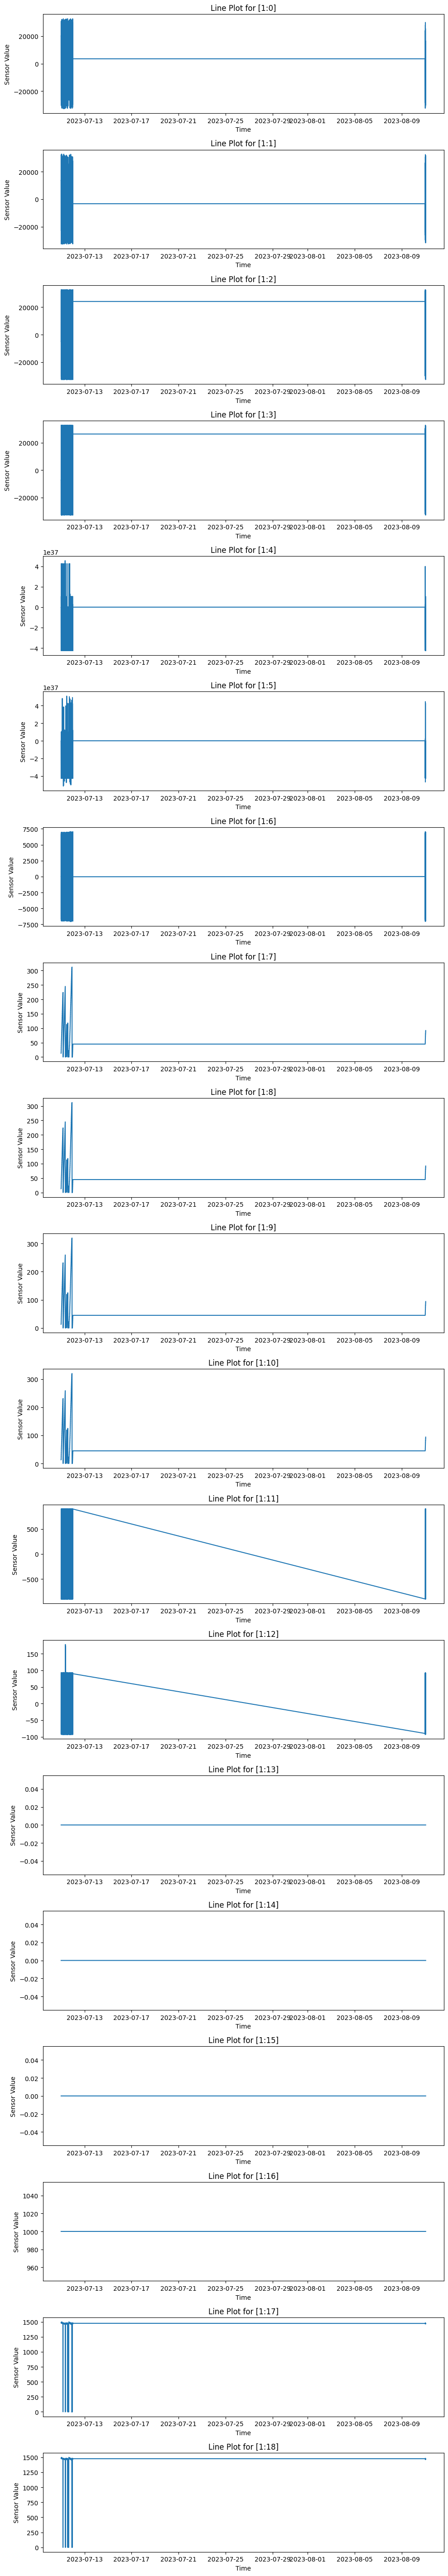

In [8]:
import seaborn as sns

numerical_columns = merged_df.columns[1:20]  
fig, axes = plt.subplots(len(numerical_columns), 1, figsize=(10, 3 * len(numerical_columns)))

for i, sensor_id in enumerate(numerical_columns):
    sns.lineplot(x='Time', y=sensor_id, data=merged_df, ax=axes[i])
    axes[i].set_title(f'Line Plot for {sensor_id}')
    axes[i].set_xlabel('Time')
    axes[i].set_ylabel('Sensor Value')

plt.tight_layout()
plt.show()


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest

numerical_columns = merged_df.columns[1:20] 

merged_df.fillna(merged_df.mean(), inplace=True)
def detect_anomalies_isolation_forest(series, sensor_id, contamination=0.0007, time_threshold=2000):  # Adjust contamination value and time threshold
    data = series.values.reshape(-1, 1)
    isolation_forest = IsolationForest(contamination=contamination)
    anomalies = isolation_forest.fit_predict(data)

    anomaly_intervals = []
    start_time = None
    anomaly_count = 0
    for index, is_anomaly in enumerate(anomalies):
        if is_anomaly == -1 and start_time is None:
            start_time = merged_df['Time'].iloc[index]
            anomaly_count += 1
        elif is_anomaly != -1 and start_time is not None:
            end_time = merged_df['Time'].iloc[index - 1]
            if anomaly_count >= 3:
                anomaly_intervals.append(('rare', start_time, end_time))
            else:
                anomaly_intervals.append(('frequent', start_time, end_time))
            start_time = None
            anomaly_count = 0
        elif is_anomaly == -1:
            anomaly_count += 1

    return anomaly_intervals

all_anomalies = []

for sensor_id in numerical_columns:
    anomaly_intervals = detect_anomalies_isolation_forest(merged_df[sensor_id], sensor_id)
    all_anomalies.append((sensor_id, anomaly_intervals))

anomalies_df = pd.DataFrame(all_anomalies, columns=['SensorID', 'AnomalyIntervals'])
print(anomalies_df)


   SensorID                                   AnomalyIntervals
0     [1:0]                                                 []
1     [1:1]  [(rare, 2023-07-11 01:20:10.650000, 2023-07-11...
2     [1:2]                                                 []
3     [1:3]  [(rare, 2023-07-11 00:10:16.620000, 2023-07-11...
4     [1:4]  [(frequent, 2023-07-11 00:47:56.620000, 2023-0...
5     [1:5]  [(frequent, 2023-07-11 00:08:23.620000, 2023-0...
6     [1:6]  [(frequent, 2023-07-11 00:27:22.620000, 2023-0...
7     [1:7]  [(rare, 2023-07-11 21:41:50.880000, 2023-07-11...
8     [1:8]  [(rare, 2023-07-11 21:44:38.880000, 2023-07-11...
9     [1:9]  [(rare, 2023-07-11 21:48:55.880000, 2023-07-11...
10   [1:10]  [(rare, 2023-07-11 21:43:43.880000, 2023-07-11...
11   [1:11]  [(frequent, 2023-07-11 00:19:17.620000, 2023-0...
12   [1:12]                                                 []
13   [1:13]                                                 []
14   [1:14]                                            

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest

numerical_columns = merged_df.columns[1:] 

merged_df.fillna(merged_df.mean(), inplace=True)
def detect_anomalies_isolation_forest(series, contamination=0.0007, time_threshold=2000):
    data = series.values.reshape(-1, 1)
    isolation_forest = IsolationForest(contamination=contamination)
    anomalies = isolation_forest.fit_predict(data)
    anomaly_intervals = []
    start_time = None
    anomaly_count = 0
    for index, is_anomaly in enumerate(anomalies):
        if is_anomaly == -1 and start_time is None:
            start_time = merged_df['Time'].iloc[index]
            anomaly_count += 1
        elif is_anomaly != -1 and start_time is not None:
            end_time = merged_df['Time'].iloc[index - 1]
            if anomaly_count >= 3:
                anomaly_intervals.append(('rare', start_time, end_time))
            else:
                anomaly_intervals.append(('frequent', start_time, end_time))
            start_time = None
            anomaly_count = 0
        elif is_anomaly == -1:
            anomaly_count += 1

    return anomaly_intervals
sensor_anomalies = {sensor_id: [] for sensor_id in numerical_columns}

for sensor_id in numerical_columns:
    anomaly_intervals = detect_anomalies_isolation_forest(merged_df[sensor_id])
    sensor_anomalies[sensor_id].extend([(start_time, end_time) for _, start_time, end_time in anomaly_intervals if 'rare' in _])

anomalies_df = pd.DataFrame(list(sensor_anomalies.items()), columns=['SensorID', 'Anomalies'])
anomalies_df.to_csv('anomalies.csv', index=False)
print(anomalies_df)


      SensorID                                          Anomalies
0        [1:0]  [(2023-07-11 06:42:24.530000, 2023-07-11 06:43...
1        [1:1]  [(2023-07-11 01:20:10.650000, 2023-07-11 01:21...
2        [1:2]                                                 []
3        [1:3]  [(2023-07-11 02:41:00.440000, 2023-07-11 02:41...
4        [1:4]  [(2023-07-11 01:58:13.920000, 2023-07-11 01:58...
...        ...                                                ...
2618  [26.119]                                                 []
2619  [26.120]                                                 []
2620  [26.121]                                                 []
2621  [26.122]                                                 []
2622  [26.123]                                                 []

[2623 rows x 2 columns]


In [11]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest

numerical_columns = merged_df.columns[1:]
merged_df.fillna(merged_df.mean(), inplace=True)

def detect_anomalies_isolation_forest(series, contamination=0.0007, time_threshold=2000):
    data = series.values.reshape(-1, 1)
    isolation_forest = IsolationForest(contamination=contamination)
    anomalies = isolation_forest.fit_predict(data)

    anomaly_intervals = []
    start_time = None
    anomaly_count = 0
    for index, is_anomaly in enumerate(anomalies):
        if is_anomaly == -1 and start_time is None:
            start_time = merged_df['Time'].iloc[index]
            anomaly_count += 1
        elif is_anomaly != -1 and start_time is not None:
            end_time = merged_df['Time'].iloc[index - 1]
            if anomaly_count >= 3:
                anomaly_intervals.append(('rare', start_time, end_time))
            else:
                anomaly_intervals.append(('frequent', start_time, end_time))
            start_time = None
            anomaly_count = 0
        elif is_anomaly == -1:
            anomaly_count += 1

    return anomaly_intervals

sensor_non_anomalies = {sensor_id: [] for sensor_id in numerical_columns}

for sensor_id in numerical_columns:
    anomaly_intervals = detect_anomalies_isolation_forest(merged_df[sensor_id])
    non_anomaly_intervals = [(merged_df['Time'].iloc[i], merged_df['Time'].iloc[i+1]) for i in range(len(anomaly_intervals) - 1) if 'rare' not in anomaly_intervals[i][0]]
    sensor_non_anomalies[sensor_id].extend(non_anomaly_intervals)

non_anomalies_df = pd.DataFrame(list(sensor_non_anomalies.items()), columns=['SensorID', 'Cobbles'])


In [12]:
import pandas as pd

sensor_data_df = pd.DataFrame([(region, sensorID) for region, sensorIDs in sensor_data.items() for sensorID in sensorIDs], columns=['Region', 'SensorID'])
cobb = pd.merge(non_anomalies_df, sensor_data_df, left_on='SensorID', right_on='SensorID', how='inner')
cobb = cobb[['Region', 'SensorID', 'Cobbles']]
cobb.to_csv('cobbles.csv', index=False)